In [1]:
import numpy as np

# Parámetros de la señal
frecuencia = 50
amplitud = 127
muestras = 256
ts = 1/500

# Generar el tiempo
tiempo = np.linspace(0, muestras, muestras, endpoint=False)

# Generar la señal senoidal
senal = amplitud * np.sin(2 * np.pi * frecuencia * tiempo * ts)
print(np.mean(senal))
print(np.std(senal))

# Guardar la señal en un archivo de texto
np.savetxt('senal.txt', senal, fmt='%d')

1.5268195672705178
89.61398813178667


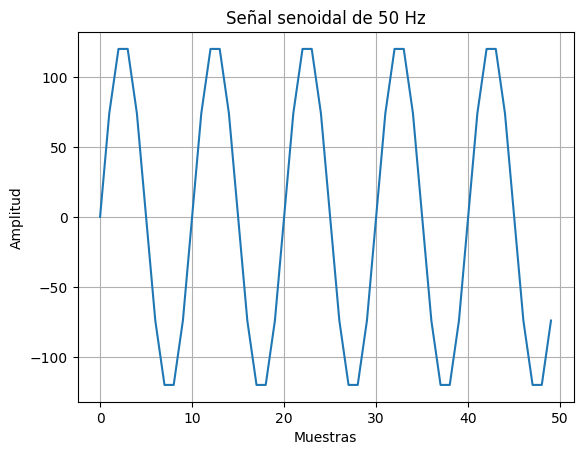

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo
senal = np.loadtxt('senal.txt')

# Graficar la señal
plt.plot(senal[0:50])
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal senoidal de 50 Hz')
plt.grid(True)
plt.show()

In [4]:
import numpy as np

# Parámetros de la señal
frecuencia = 50
amplitud = 127
muestras = 256
ts = 1/500
amplitud_ruido = 0.25 * amplitud

# Generar el tiempo
tiempo = np.linspace(0, muestras, muestras, endpoint=False)


# Generar la señal senoidal
senal = amplitud * np.sin(2 * np.pi * frecuencia * tiempo * ts)

# Agregar ruido aleatorio
ruido = np.random.normal(0, amplitud_ruido, muestras)
senal += ruido

print(np.mean(senal))
print(np.std(senal))

# Guardar la señal en un archivo de texto
np.savetxt('senal.txt', senal, fmt='%d')

2.3654876130643037
94.45154963890248


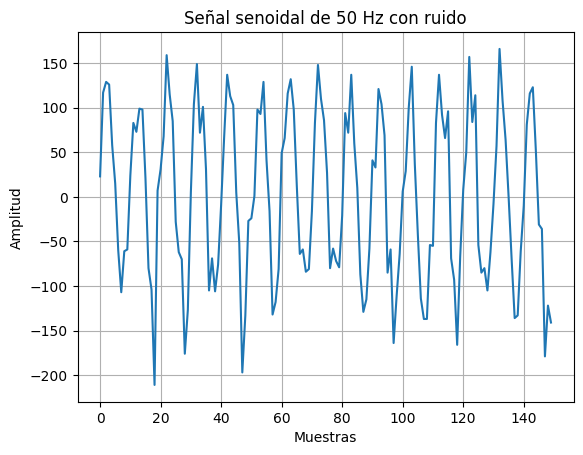

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo
senal = np.loadtxt('senal.txt')

# Graficar la señal
plt.plot(senal[0:150])
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal senoidal de 50 Hz con ruido')
plt.grid(True)
plt.show()

In [6]:
import numpy as np

# Parámetros de la distribución
media = 25
desviacion_estandar = 3
muestras = 100
outliers = 10

# Generar los datos
datos = np.random.normal(media, desviacion_estandar, muestras)

# Agregar algunos valores atípicos en posiciones aleatorias
posiciones = np.random.choice(muestras, outliers, replace=False)
datos[posiciones] = media + np.random.normal(0, 3 * desviacion_estandar, outliers)

# Redondear los datos a números enteros
datos = np.round(datos).astype(int)
print(np.mean(datos))
print(np.std(datos))

# Guardar el arreglo en un archivo de texto con formato entero
np.savetxt('datos_atip.txt', datos, fmt='%d')

25.03
4.350758554551149


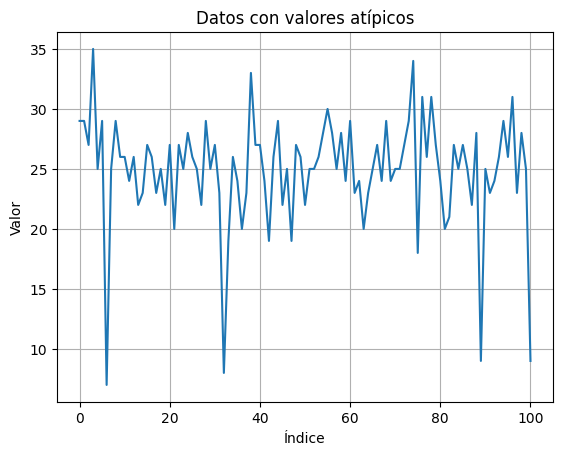

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo
datos = np.loadtxt('datos_atip.txt')

# Graficar los datos
plt.plot(datos)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Datos con valores atípicos')
plt.grid(True)
plt.show()

24.871287128712872
4.61092840104217
24.82885431400283
2.2591293249663003


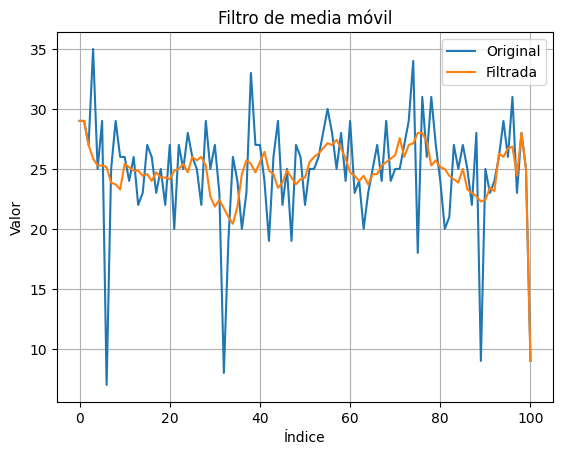

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo
datos = np.loadtxt('datos_atip.txt')

# Aplicar el filtro de media móvil manualmente
orden = 3
datos_filtrados = np.zeros_like(datos)
for i in range(orden, len(datos) - orden):
    datos_filtrados[i] = np.mean(datos[i-orden:i+orden+1])
datos_filtrados[0] = datos[0]
datos_filtrados[1] = datos[1]
datos_filtrados[2] = datos[2]
datos_filtrados[-1] = datos[-1]
datos_filtrados[-2] = datos[-2]
datos_filtrados[-3] = datos[-3]
print(np.mean(datos))
print(np.std(datos))
print(np.mean(datos_filtrados))
print(np.std(datos_filtrados))

# Graficar la señal original y la filtrada
plt.plot(datos, label='Original')
plt.plot(datos_filtrados, label='Filtrada')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Filtro de media móvil')
plt.legend()
plt.grid(True)
plt.show()